In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.svm import SVC

In [2]:
train = []

with open('features.train', 'r') as f:
    for line in f:
        train.append([float(i) for i in line.split()])

train = np.array(train)

In [3]:
x = []

for i in train:
    digit, intensity, symmetry = i[0], i[1], i[2]
    if digit == 0:
        x.append([intensity, symmetry, 1])
    else:
        x.append([intensity, symmetry, -1])

x = np.array(x)

In [4]:
G = [10**i for i in [-1, 0, 1, 2, 3]]
print (G)

[0.1, 1, 10, 100, 1000]


In [5]:
G_hist = [0]*5
for time in range(100):
    print (time, end='\r')
    Eval = []
    for i in G:
        # fit the model, don't regularize for illustration purposes
        clf = SVC(kernel='rbf', C=0.1, gamma=i)
        np.random.shuffle(x)
        clf.fit(x[1000:, :2], x[1000:, 2])
        Eval.append(1-clf.score(x[:1000, :2], x[:1000, 2]))
    idx = np.argmin(Eval)
    print(Eval)
    G_hist[idx] += 1

[0.16500000000000004, 0.10599999999999998, 0.09599999999999997, 0.09599999999999997, 0.15500000000000003]
[0.15900000000000003, 0.122, 0.10399999999999998, 0.10799999999999998, 0.16500000000000004]
[0.15600000000000003, 0.118, 0.10599999999999998, 0.08399999999999996, 0.17300000000000004]
[0.17000000000000004, 0.118, 0.09699999999999998, 0.11599999999999999, 0.17800000000000005]
[0.16900000000000004, 0.119, 0.08599999999999997, 0.10099999999999998, 0.15600000000000003]
[0.15500000000000003, 0.10899999999999999, 0.10099999999999998, 0.09799999999999998, 0.17300000000000004]
[0.16000000000000003, 0.11499999999999999, 0.09599999999999997, 0.09199999999999997, 0.16100000000000003]
[0.15600000000000003, 0.11499999999999999, 0.10499999999999998, 0.09499999999999997, 0.16300000000000003]
[0.15400000000000003, 0.10499999999999998, 0.10799999999999998, 0.11099999999999999, 0.16100000000000003]
[0.15800000000000003, 0.10599999999999998, 0.07799999999999996, 0.09599999999999997, 0.172000000000000

[0.18000000000000005, 0.10799999999999998, 0.10299999999999998, 0.09499999999999997, 0.16800000000000004]
[0.15600000000000003, 0.10099999999999998, 0.10799999999999998, 0.08599999999999997, 0.15800000000000003]
[0.15700000000000003, 0.11099999999999999, 0.10199999999999998, 0.09999999999999998, 0.17800000000000005]
[0.16000000000000003, 0.08399999999999996, 0.10799999999999998, 0.08499999999999996, 0.17900000000000005]
[0.16100000000000003, 0.10399999999999998, 0.09599999999999997, 0.09399999999999997, 0.16200000000000003]
[0.16600000000000004, 0.11199999999999999, 0.10899999999999999, 0.10299999999999998, 0.14500000000000002]
[0.15500000000000003, 0.11199999999999999, 0.10199999999999998, 0.09599999999999997, 0.16700000000000004]
[0.15100000000000002, 0.10399999999999998, 0.09399999999999997, 0.10999999999999999, 0.16200000000000003]
[0.15900000000000003, 0.10399999999999998, 0.09299999999999997, 0.10499999999999998, 0.14800000000000002]
[0.16500000000000004, 0.08899999999999997, 0.1

In [6]:
print (G_hist)

[0, 13, 42, 45, 0]


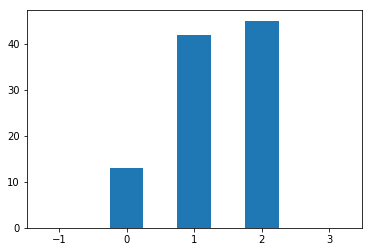

In [7]:
hist = []
for i, j in enumerate(G_hist):
    hist += [np.log10(G[i])]*j
plt.hist(hist, bins=[-1.5, -0.5, 0.5, 1.5, 2.5, 3.5], rwidth=0.5)
plt.savefig('16.png')
plt.show()